In [ ]:
import pandas  as  pd 
import numpy as np

In [ ]:
airlines, airports, flights = pd.read_csv('airlines.csv'),pd.read_csv('airports.csv'), pd.read_csv('flights.csv', dtype={'ORIGIN_AIRPORT': str,'DESTINATION_AIRPORT': str })

In [ ]:
airports.describe()

,LATITUDE,LONGITUDE
count,319.000000,319.000000
mean,38.981244,-98.378964
std,8.616736,21.523492
min,13.483450,-176.646030
25%,33.652040,-110.839385
50%,39.297610,-93.403070
75%,43.154675,-82.722995
max,71.285450,-64.798560


In [ ]:
airlines.describe()

,IATA_CODE,AIRLINE
count,14,14
unique,14,14
top,VX,American Eagle Airlines Inc.
freq,1,1


In [ ]:
flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,635182.0,635182.000000,635182.000000,635182.000000,635182.000000,635182.000000,615406.000000,615406.000000,615068.000000,615068.000000,635180.000000,613538.000000,613538.000000,635182.000000,614526.000000,614526.000000,635182.000000,614526.000000,613538.000000,635181.000000,635181.000000,125683.000000,125683.000000,125683.000000,125683.000000,125683.000000
mean,2015.0,1.260105,13.293465,3.921419,2262.035990,1322.628236,1332.060175,9.610690,16.492583,1356.233467,140.013428,136.168865,112.192606,800.816821,1488.225841,7.493213,1507.448451,1495.186610,5.563383,0.002176,0.031900,13.850982,0.066548,17.901315,22.812321,3.207538
std,0.0,0.438692,8.973353,1.988187,1802.075826,466.734357,477.798836,37.112638,9.688325,477.702635,74.687427,73.520832,71.502863,594.453763,496.824459,6.291299,481.710045,500.115075,39.956582,0.046594,0.175733,25.928402,2.039788,46.101280,41.632095,21.105292
min,2015.0,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,-48.000000,1.000000,1.000000,20.000000,17.000000,8.000000,31.000000,1.000000,1.000000,1.000000,1.000000,-82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,1.000000,6.000000,2.000000,758.000000,925.000000,931.000000,-5.000000,11.000000,946.000000,85.000000,82.000000,60.000000,364.000000,1114.000000,4.000000,1125.000000,1119.000000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,1.000000,11.000000,4.000000,1732.000000,1320.000000,1328.000000,-2.000000,14.000000,1342.000000,121.000000,118.000000,94.000000,641.000000,1518.000000,6.000000,1525.000000,1523.000000,-4.000000,0.000000,0.000000,4.000000,0.000000,1.000000,3.000000,0.000000
75%,2015.0,2.000000,21.000000,6.000000,3486.000000,1719.000000,1727.000000,8.000000,19.000000,1741.000000,173.000000,168.000000,143.000000,1044.000000,1909.000000,9.000000,1914.000000,1915.000000,10.000000,0.000000,0.000000,19.000000,0.000000,18.000000,29.000000,0.000000
max,2015.0,2.000000,31.000000,7.000000,9793.000000,2359.000000,2400.000000,1988.000000,177.000000,2400.000000,718.000000,766.000000,684.000000,4983.000000,2400.000000,197.000000,2359.000000,2400.000000,1971.000000,1.000000,1.000000,830.000000,241.000000,1971.000000,948.000000,1116.000000


In [ ]:
airlines.isnull().sum()

IATA_CODE    0
AIRLINE      0
dtype: int64

In [ ]:
airports.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [ ]:
flights.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [ ]:
airports.head(5) # просмотр таблицы на предмет join 

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [ ]:
airlines.head(5) # просмотр таблицы на предмет join 

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [ ]:
flights.head(5) # просмотр таблицы на предмет join 

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
airlines = airlines.rename({'IATA_CODE': 'AIRLANE_CODE', 'AIRLINE': 'AIRLINE_NAME'}, axis=1)  #  переименуем колонки перед  join

In [ ]:
flights  = pd.merge(flights, airlines, how='left', left_on='AIRLINE', right_on='AIRLANE_CODE')

In [ ]:
flights.shape

(635182, 33)

In [ ]:
flights.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLANE_CODE,AIRLINE_NAME
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,US,US Airways Inc.
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.


In [ ]:
#Для полноты картины  мы дожны прилинковать данные аиропортов для мест отбывания и мест  прибывания  

In [ ]:
# перед джионом  создадим второй справочник  и переимениуем их колонки  более  понятно для просмотра после join
# IATA_CODE	AIRPORT	CITY	STATE	COUNTRY	LATITUDE	LONGITUDE
origin_airports = airports.rename ({'IATA_CODE': 'ORIGIN_AIRPORT_CODE',
                                    'AIRPORT': 'ORIGIN_AIRPORT_NAME',
                                    'CITY': 'ORIGIN_AIRPORT_CITY',
                                    'STATE': 'ORIGIN_AIRPORT_STATE',
                                    'COUNTRY': 'ORIGIN_AIRPORT_COUNTRY',
                                    'LATITUDE': 'ORIGIN_AIRPORT_LATITUDE',
                                    'LONGITUDE': 'ORGIN_AIRPORT_LONGITUDE'
                                    }, axis=1)
destination_airports = airports.rename ({'IATA_CODE': 'DESTIN_AIRPORT_CODE',
                                          'AIRPORT': 'DESTIN_AIRPORT_NAME',
                                          'CITY': 'DESTIN_AIRPORT_CITY',
                                          'STATE': 'DESTIN_AIRPORT_STATE',
                                          'COUNTRY': 'DESTIN_AIRPORT_COUNTRY',
                                          'LATITUDE': 'DESTIN_AIRPORT_LATITUDE',
                                          'LONGITUDE': 'DESTIN_AIRPORT_LONGITUDE'
                                    }, axis=1)

In [ ]:
flights_full = pd.merge(flights, origin_airports, how='left', left_on='ORIGIN_AIRPORT', right_on='ORIGIN_AIRPORT_CODE').merge(destination_airports, how='left', left_on='DESTINATION_AIRPORT', right_on='DESTIN_AIRPORT_CODE')

In [ ]:
flights_full.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLANE_CODE,AIRLINE_NAME,ORIGIN_AIRPORT_CODE,ORIGIN_AIRPORT_NAME,ORIGIN_AIRPORT_CITY,ORIGIN_AIRPORT_STATE,ORIGIN_AIRPORT_COUNTRY,ORIGIN_AIRPORT_LATITUDE,ORGIN_AIRPORT_LONGITUDE,DESTIN_AIRPORT_CODE,DESTIN_AIRPORT_NAME,DESTIN_AIRPORT_CITY,DESTIN_AIRPORT_STATE,DESTIN_AIRPORT_COUNTRY,DESTIN_AIRPORT_LATITUDE,DESTIN_AIRPORT_LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,PBI,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,US,US Airways Inc.,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,CLT,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,MIA,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619


In [ ]:
to_graph = flights_full.loc[flights_full['DEPARTURE_DELAY'] >0].groupby(['ORIGIN_AIRPORT_NAME', 'ORIGIN_AIRPORT_CITY'])['DEPARTURE_DELAY'].agg('min').reset_index().sort_values(by=['DEPARTURE_DELAY'], ascending=True)


In [ ]:
to_graph.reset_index().head(20)

,index,ORIGIN_AIRPORT_NAME,ORIGIN_AIRPORT_CITY,DEPARTURE_DELAY
0,0,Aberdeen Regional Airport,Aberdeen,1.0
1,189,Minot International Airport,Minot,1.0
2,190,Missoula International Airport,Missoula,1.0
3,191,Mobile Regional Airport,Mobile,1.0
4,192,Monroe Regional Airport,Monroe,1.0
5,193,Monterey Regional Airport (Monterey Peninsula ...,Monterey,1.0
6,194,Montgomery Regional Airport,Montgomery,1.0
7,195,Montrose Regional Airport,Montrose,1.0
8,197,Myrtle Beach International Airport,Myrtle Beach,1.0
9,198,Nashville International Airport,Nashville,1.0


In [ ]:
import seaborn as sns
import matplotlib

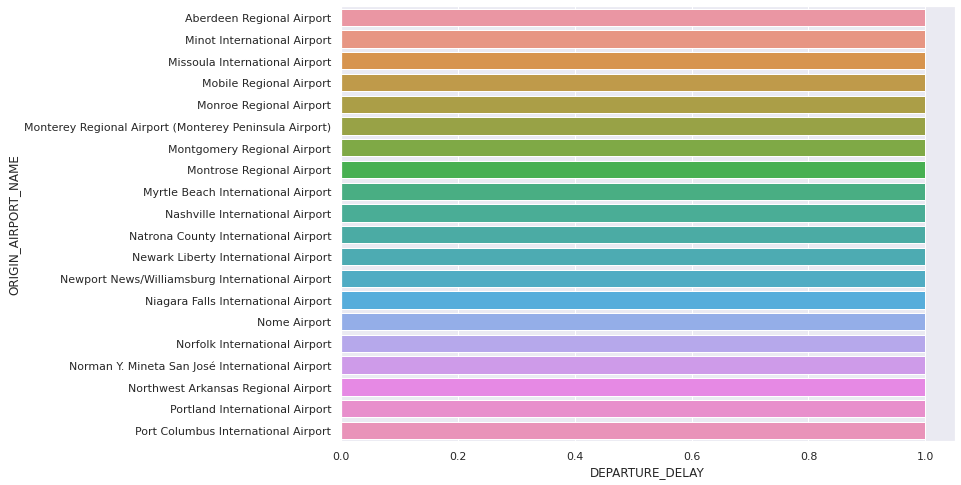

In [ ]:
sns.barplot(data=to_graph.head(20), x="DEPARTURE_DELAY", y="ORIGIN_AIRPORT_NAME")

In [ ]:
# 1) Минимальная  задержка 	 1 
    # аэропорты можно посмотреть выше 

In [ ]:
filter1 = flights_full['DESTIN_AIRPORT_NAME'].str.lower() == 'Los Angeles International Airport'.lower()
filter2 = flights_full['ARRIVAL_DELAY'] == 0  
filter3 = flights_full['CANCELLED'] == 0

In [ ]:
# flights_full.where(filter1.head(100) & filter2.head(100))
flights_full.loc[filter1 & filter2 & filter3]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLANE_CODE,AIRLINE_NAME,ORIGIN_AIRPORT_CODE,ORIGIN_AIRPORT_NAME,ORIGIN_AIRPORT_CITY,ORIGIN_AIRPORT_STATE,ORIGIN_AIRPORT_COUNTRY,ORIGIN_AIRPORT_LATITUDE,ORGIN_AIRPORT_LONGITUDE,DESTIN_AIRPORT_CODE,DESTIN_AIRPORT_NAME,DESTIN_AIRPORT_CITY,DESTIN_AIRPORT_STATE,DESTIN_AIRPORT_COUNTRY,DESTIN_AIRPORT_LATITUDE,DESTIN_AIRPORT_LONGITUDE
101,2015,1,1,4,OO,6512,N925SW,FAT,LAX,535,530.0,-5.0,33.0,603.0,75.0,80.0,42.0,209,645.0,5.0,650,650.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,OO,Skywest Airlines Inc.,FAT,Fresno Yosemite International Airport,Fresno,CA,USA,36.77619,-119.71814,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
1140,2015,1,1,4,UA,661,N516UA,ORD,LAX,720,720.0,0.0,17.0,737.0,270.0,270.0,242.0,1744,939.0,11.0,950,950.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,UA,United Air Lines Inc.,ORD,Chicago O'Hare International Airport,Chicago,IL,USA,41.97960,-87.90446,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
2246,2015,1,1,4,AA,2269,N3KUAA,PBI,LAX,845,850.0,5.0,14.0,904.0,355.0,350.0,326.0,2330,1130.0,10.0,1140,1140.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
3152,2015,1,1,4,WN,1060,N491WN,SMF,LAX,950,945.0,-5.0,18.0,1003.0,80.0,85.0,57.0,373,1100.0,10.0,1110,1110.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,WN,Southwest Airlines Co.,SMF,Sacramento International Airport,Sacramento,CA,USA,38.69542,-121.59077,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
5010,2015,1,1,4,UA,670,N840UA,EWR,LAX,1150,1148.0,-2.0,15.0,1203.0,377.0,379.0,352.0,2454,1455.0,12.0,1507,1507.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,UA,United Air Lines Inc.,EWR,Newark Liberty International Airport,Newark,NJ,USA,40.69250,-74.16866,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626544,2015,2,11,3,AS,460,N524AS,SEA,LAX,1200,1157.0,-3.0,15.0,1212.0,146.0,149.0,124.0,954,1416.0,10.0,1426,1426.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
629151,2015,2,11,3,AS,570,N306AS,PDX,LAX,1440,1444.0,4.0,9.0,1453.0,130.0,126.0,107.0,834,1640.0,10.0,1650,1650.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,PDX,Portland International Airport,Portland,OR,USA,45.58872,-122.59750,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
632269,2015,2,11,3,WN,329,N7703A,LAS,LAX,1745,1757.0,12.0,12.0,1809.0,70.0,58.0,40.0,236,1849.0,6.0,1855,1855.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,WN,Southwest Airlines Co.,LAS,McCarran International Airport,Las Vegas,NV,USA,36.08036,-115.15233,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
632453,2015,2,11,3,UA,1235,N68452,MCO,LAX,1757,1754.0,-3.0,11.0,1805.0,334.0,337.0,291.0,2218,1956.0,35.0,2031,2031.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,UA,United Air Lines Inc.,MCO,Orlando International Airport,Orlando,FL,USA,28.42889,-81.31603,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807


In [ ]:
flights_full.loc[filter1 & filter2 & filter3].shape

(479, 47)

In [ ]:
flights_full.shape

(635182, 47)

In [ ]:
inTime = flights_full.loc[filter1 & filter2 & filter3]

In [ ]:
inTime['MONTH'].unique()

array([1, 2])

In [ ]:
to_graph2 = inTime.groupby(['AIRLINE_NAME', 'MONTH', 'YEAR']).agg('count').sort_values(by=['AIRLINE','MONTH', 'YEAR', 'DAY'], ascending=False).reset_index()

In [ ]:
to_graph2.head(5)

,AIRLINE_NAME,MONTH,YEAR,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLANE_CODE,ORIGIN_AIRPORT_CODE,ORIGIN_AIRPORT_NAME,ORIGIN_AIRPORT_CITY,ORIGIN_AIRPORT_STATE,ORIGIN_AIRPORT_COUNTRY,ORIGIN_AIRPORT_LATITUDE,ORGIN_AIRPORT_LONGITUDE,DESTIN_AIRPORT_CODE,DESTIN_AIRPORT_NAME,DESTIN_AIRPORT_CITY,DESTIN_AIRPORT_STATE,DESTIN_AIRPORT_COUNTRY,DESTIN_AIRPORT_LATITUDE,DESTIN_AIRPORT_LONGITUDE
0,Skywest Airlines Inc.,1,2015,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,0,0,0,0,0,0,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104
1,Southwest Airlines Co.,1,2015,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,0,0,0,0,0,0,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69
2,United Air Lines Inc.,1,2015,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,0,0,0,0,0,0,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
3,American Airlines Inc.,1,2015,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,0,0,0,0,0,0,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48
4,Skywest Airlines Inc.,2,2015,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,0,0,0,0,0,0,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30


In [ ]:
to_graph2.shape

(21, 47)

In [ ]:
np.unique(to_graph2[['YEAR']], axis=0)

array([[2015]])

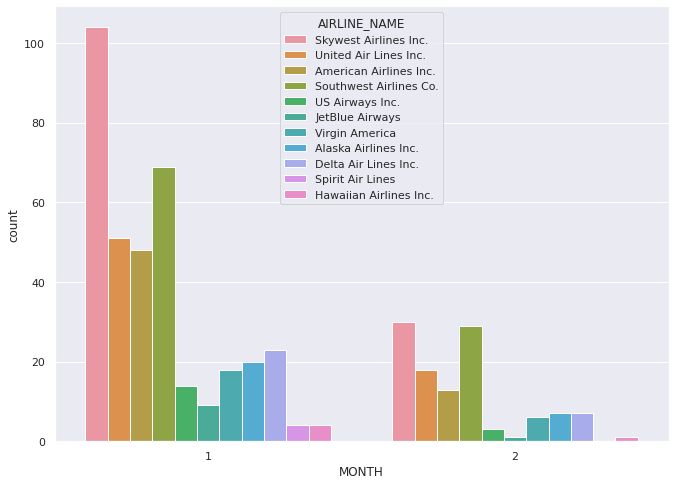

In [ ]:
sns.set(rc={'figure.figsize':(11,8)})
sns.countplot(x="MONTH",  hue="AIRLINE_NAME", data=inTime) # месячная динамика полетов в LA

In [ ]:
to_graph2 = inTime.groupby(['AIRLINE_NAME', 'MONTH', 'YEAR']).agg('count').reset_index().sort_values(by=['AIRLINE','MONTH', 'YEAR'], ascending=False) #  общее число  пунктуальных рейсов в Los Angeles International Airport  (учтены отмененные) в разрезе авиакомпаний за год
year  = to_graph2[['AIRLINE_NAME', 'MONTH', 'YEAR','AIRLINE']]
year.groupby(['AIRLINE_NAME', 'YEAR']).agg('sum').reset_index().sort_values(by=['AIRLINE', 'YEAR'], ascending=False)

,AIRLINE_NAME,YEAR,MONTH,AIRLINE
5,Skywest Airlines Inc.,2015,3,134
6,Southwest Airlines Co.,2015,3,98
9,United Air Lines Inc.,2015,3,69
1,American Airlines Inc.,2015,3,61
2,Delta Air Lines Inc.,2015,3,30
0,Alaska Airlines Inc.,2015,3,27
10,Virgin America,2015,3,24
8,US Airways Inc.,2015,3,17
4,JetBlue Airways,2015,3,10
3,Hawaiian Airlines Inc.,2015,3,5


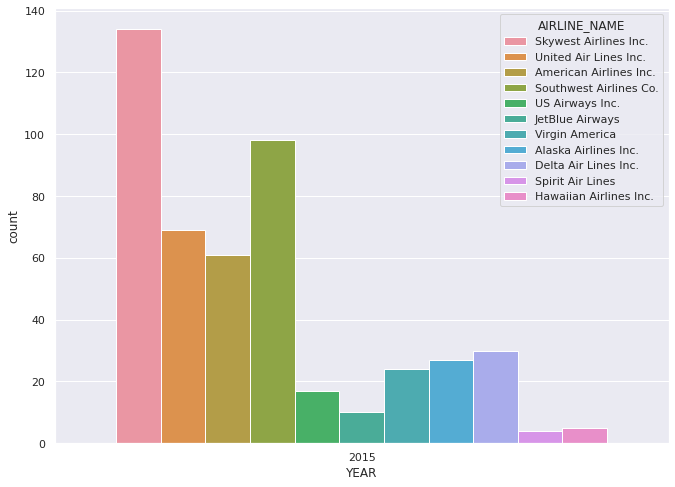

In [ ]:
# проверка пунктуальности авиакомпании по кол-ву рейсов за год 
sns.set(rc={'figure.figsize':(11,8)})
# sns.barplot(data=to_graph2, x="MONTH", y="AIRLINE")
sns.countplot(x="YEAR",  hue="AIRLINE_NAME", data=inTime)

In [ ]:
canceled  = flights_full[flights_full['CANCELLED'] == 0]
year_full= canceled.groupby(['AIRLINE_NAME', 'MONTH', 'YEAR']).agg('count').reset_index().sort_values(by=['AIRLINE','MONTH', 'YEAR'], ascending=False)
full_year_group =  year_full.groupby(['AIRLINE_NAME', 'YEAR']).agg('sum').reset_index().sort_values(by=['AIRLINE', 'YEAR'], ascending=False)
to_graph = full_year_group[['AIRLINE_NAME','YEAR','AIRLINE']]

In [ ]:
to_graph


,AIRLINE_NAME,YEAR,AIRLINE
9,Southwest Airlines Co.,2015,132310
4,Delta Air Lines Inc.,2015,86341
3,Atlantic Southeast Airlines,2015,64148
8,Skywest Airlines Inc.,2015,62868
1,American Airlines Inc.,2015,57984
12,United Air Lines Inc.,2015,50246
11,US Airways Inc.,2015,43627
2,American Eagle Airlines Inc.,2015,36808
7,JetBlue Airways,2015,27181
0,Alaska Airlines Inc.,2015,17860


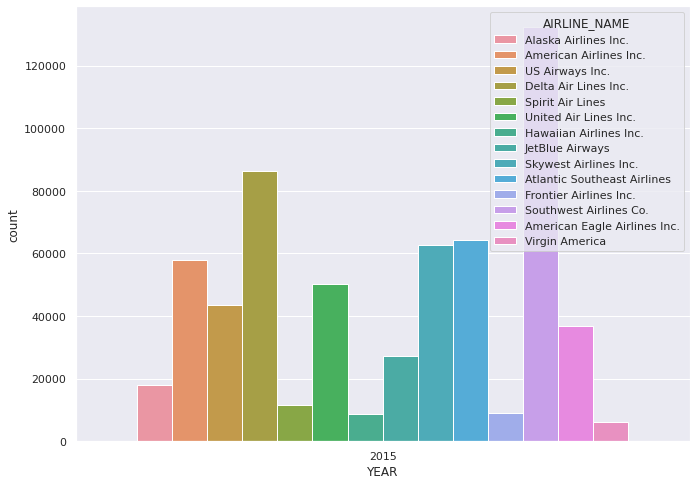

In [ ]:
# Проверка  общего количества рейсов в разрезе авиакомпаний
sns.set(rc={'figure.figsize':(11,8)})
sns.countplot(x="YEAR",  hue="AIRLINE_NAME", data=flights_full[flights_full['CANCELLED'] == 0]) #учитываем только не отменененные рейсы 

In [ ]:
flights_full[flights_full['CANCELLED'] == 0].head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLANE_CODE,AIRLINE_NAME,ORIGIN_AIRPORT_CODE,ORIGIN_AIRPORT_NAME,ORIGIN_AIRPORT_CITY,ORIGIN_AIRPORT_STATE,ORIGIN_AIRPORT_COUNTRY,ORIGIN_AIRPORT_LATITUDE,ORGIN_AIRPORT_LONGITUDE,DESTIN_AIRPORT_CODE,DESTIN_AIRPORT_NAME,DESTIN_AIRPORT_CITY,DESTIN_AIRPORT_STATE,DESTIN_AIRPORT_COUNTRY,DESTIN_AIRPORT_LATITUDE,DESTIN_AIRPORT_LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,PBI,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,US,US Airways Inc.,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,CLT,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,MIA,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619


In [ ]:
#Как можно видеть компания South west air lines оказалась самой пунктуальной среди остальных 
#А компании american airlines  и south west  airlines оказались   Los Angeles International Airport

In [ ]:
max_taxi_out = flights_full.groupby('ORIGIN_AIRPORT_NAME')['TAXI_OUT'].max().reset_index()

In [ ]:
max_taxi_out.max() #  аэропорт с самой большой долей руления

ORIGIN_AIRPORT_NAME    Yuma International Airport
TAXI_OUT                                      177
dtype: object

In [ ]:
max_taxi_out.mean() 

TAXI_OUT    73.162939
dtype: float64

In [ ]:
flights_full.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLANE_CODE,AIRLINE_NAME,ORIGIN_AIRPORT_CODE,ORIGIN_AIRPORT_NAME,ORIGIN_AIRPORT_CITY,ORIGIN_AIRPORT_STATE,ORIGIN_AIRPORT_COUNTRY,ORIGIN_AIRPORT_LATITUDE,ORGIN_AIRPORT_LONGITUDE,DESTIN_AIRPORT_CODE,DESTIN_AIRPORT_NAME,DESTIN_AIRPORT_CITY,DESTIN_AIRPORT_STATE,DESTIN_AIRPORT_COUNTRY,DESTIN_AIRPORT_LATITUDE,DESTIN_AIRPORT_LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,PBI,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,US,US Airways Inc.,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,CLT,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,MIA,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619


In [ ]:
flights_full.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLANE_CODE,AIRLINE_NAME,ORIGIN_AIRPORT_CODE,ORIGIN_AIRPORT_NAME,ORIGIN_AIRPORT_CITY,ORIGIN_AIRPORT_STATE,ORIGIN_AIRPORT_COUNTRY,ORIGIN_AIRPORT_LATITUDE,ORGIN_AIRPORT_LONGITUDE,DESTIN_AIRPORT_CODE,DESTIN_AIRPORT_NAME,DESTIN_AIRPORT_CITY,DESTIN_AIRPORT_STATE,DESTIN_AIRPORT_COUNTRY,DESTIN_AIRPORT_LATITUDE,DESTIN_AIRPORT_LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,PBI,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,US,US Airways Inc.,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,CLT,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,MIA,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619


In [ ]:
def make_date(df):
  return datetime.date(df.YEAR, df.MONTH, df.DAY)

In [ ]:
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.dDate.dt.year
    data['month'] = data.dDate.dt.month
    data['day'] = data.dDate.dt.day
    data['dayofweek'] = data.dDate.dt.dayofweek
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['ARRIVAL_DELAY'].shift(lag)

In [ ]:
flights_full_model = flights_full[['YEAR', 'MONTH', 'DAY', 'DESTINATION_AIRPORT', 'ARRIVAL_DELAY']]
#['dDate'] = flights_full.apply(make_date,axis = 1)

In [ ]:
flights_full_model.isna().sum()

YEAR                       0
MONTH                      0
DAY                        0
DESTINATION_AIRPORT        0
ARRIVAL_DELAY          21644
dtype: int64

In [ ]:
flights_full['ARRIVAL_DELAY'].fillna(flights_full.ARRIVAL_DELAY.median(),inplace = True)

In [ ]:
flights_full_model['dDate'] = flights_full_model.apply(make_date,axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
flights_full_model

,YEAR,MONTH,DAY,DESTINATION_AIRPORT,ARRIVAL_DELAY,dDate
0,2015,1,1,SEA,-22.0,2015-01-01
1,2015,1,1,PBI,-9.0,2015-01-01
2,2015,1,1,CLT,5.0,2015-01-01
3,2015,1,1,MIA,-9.0,2015-01-01
4,2015,1,1,ANC,-21.0,2015-01-01
...,...,...,...,...,...,...
635177,2015,2,11,HOU,-13.0,2015-02-11
635178,2015,2,11,MDW,2.0,2015-02-11
635179,2015,2,11,LAS,-8.0,2015-02-11
635180,2015,2,11,LAX,-10.0,2015-02-11


In [ ]:
flights_full_model['DESTINATION_AIRPORT'] = le.fit_transform(flights_full_model['DESTINATION_AIRPORT'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
flight_grouped = flights_full_model.groupby(['dDate','DESTINATION_AIRPORT'])['ARRIVAL_DELAY'].sum().reset_index()

In [ ]:
flight_grouped['dDate'] = pd.to_datetime(flight_grouped['dDate'])

In [ ]:
flight_grouped.head(5)

,dDate,DESTINATION_AIRPORT,ARRIVAL_DELAY
0,2015-01-01,ABE,-34.0
1,2015-01-01,ABI,0.0
2,2015-01-01,ABQ,654.0
3,2015-01-01,ABR,-19.0
4,2015-01-01,ABY,-29.0


In [ ]:
flight_count = flight_grouped.groupby(['DESTINATION_AIRPORT', 'dDate'])['ARRIVAL_DELAY'].count()
flight_filter = flight_count.reset_index().groupby(['DESTINATION_AIRPORT'])['ARRIVAL_DELAY'].sum()
flight_filter = flight_filter.loc[flight_filter>21].index

In [ ]:
flight_filter[:10]

Index(['ABE', 'ABI', 'ABQ', 'ABR', 'ABY', 'ACT', 'ACV', 'ACY', 'ADQ', 'AEX'], dtype='object', name='DESTINATION_AIRPORT')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
flight_filter

Index(['ABE', 'ABI', 'ABQ', 'ABR', 'ABY', 'ACT', 'ACV', 'ACY', 'ADQ', 'AEX',
       ...
       'TXK', 'TYR', 'TYS', 'VEL', 'VLD', 'VPS', 'WRG', 'XNA', 'YAK', 'YUM'],
      dtype='object', name='DESTINATION_AIRPORT', length=309)

In [ ]:
where_to_go = []
rmse_dict = pd.DataFrame()
l=[]
for dest in flight_filter:
    tempo = flight_grouped[flight_grouped.DESTINATION_AIRPORT==dest][['dDate','ARRIVAL_DELAY']]
    tempo.columns = ['dDate','ARRIVAL_DELAY']
    tempo = pd.DataFrame(tempo)
    try:
        

         for max_lag in range(1, 21):
           for rol in range(1,8):
        
              tempo_1 = tempo.copy()
              make_features(tempo_1,max_lag,rol)
              tempo_1.dropna(inplace=True)
              tempo_1.set_index('dDate',inplace=True)
        
              X_train,X_test,y_train, y_test = train_test_split(tempo_1.drop('ARRIVAL_DELAY', axis=1),tempo_1.ARRIVAL_DELAY, shuffle=False, test_size=0.25)

              model_lr = LinearRegression()
              model_lr.fit(X_train,y_train)

              y_predicted_lr = model_lr.predict(X_test)
              l.append([dest, max_lag, rol, np.sqrt(mean_squared_error(y_test, y_predicted_lr))])
    except Exception as e:
        print('Error', str(e))
        

In [ ]:
df= pd.DataFrame(l, columns= ['dest', 'max_lag', 'rol','mse'])

In [ ]:
df.head(5)

,dest,max_lag,rol,mse
0,ABE,1,1,42.3989
1,ABE,1,2,42.3989
2,ABE,1,3,42.3989
3,ABE,1,4,42.3989
4,ABE,1,5,42.3989


In [ ]:
flight_filter.shape

(309,)

In [ ]:
df.shape

(43260, 4)

In [ ]:
df_params = df.sort_values(by='mse').groupby('dest').agg({'max_lag':'first', 'rol':'first'}).reset_index()

In [ ]:
df_tot = pd.DataFrame(where_to_go, columns=['id','mean_value','mse', 'mse-1']) 

In [ ]:
where_to_go = []
for dest in flight_filter:
    tempo = flight_grouped[flight_grouped.DESTINATION_AIRPORT==dest][['dDate','ARRIVAL_DELAY']]
    tempo.columns = ['dDate','ARRIVAL_DELAY']
    tempo = pd.DataFrame(tempo)
    try:
              make_features(tempo,df_params[df_params['dest'] == dest]['max_lag'].values[0],df_params[df_params['dest'] == dest]['rol'].values[0])
              tempo.dropna(inplace=True)
              tempo.set_index('dDate',inplace=True)
        
              X_train,X_test,y_train, y_test = train_test_split(tempo.drop('ARRIVAL_DELAY', axis=1),tempo.ARRIVAL_DELAY, shuffle=False, test_size=0.25)

              model_lr = LinearRegression()
              model_lr.fit(X_train,y_train)

              y_predicted_lr = model_lr.predict(X_test)
              where_to_go.append([dest,y_test.mean(),np.sqrt(mean_squared_error(y_test, y_predicted_lr))\
                             ,np.sqrt(mean_squared_error(y_test, X_test['lag_1']))])
    except Exception as e:
        print('Error', str(e))

In [ ]:
where_to_go[:10]

[['ABE', 39.18181818181818, 42.398900272211, 49.16761683724914],
 ['ABI', 9.75, 95.99109810089894, 135.62033402111942],
 ['ABQ', 83.2, 397.98865348835056, 407.56790845207627],
 ['ABR', 0.36363636363636365, 32.1323995912891, 43.22246890428424],
 ['ABY', -13.88888888888889, 22.286266412300797, 40.97831404806965],
 ['ACT', 31.6, 108.32977289978506, 167.37891145541604],
 ['ACV', 20.636363636363637, 79.28931057200982, 109.06878563548784],
 ['ACY', 169.77777777777777, 133.77735278425905, 266.8389027109803],
 ['ADQ', -2.125, 14.497444417886486, 20.44810504667853],
 ['AEX', 29.818181818181817, 114.0404145851996, 130.221489638371]]

In [ ]:
final_df  = pd.DataFrame(where_to_go, columns=['id','mean_value','mse', 'mse-1'])

In [ ]:
final_df

,id,mean_value,mse,mse-1
0,ABE,39.181818,42.398900,49.167617
1,ABI,9.750000,95.991098,135.620334
2,ABQ,83.200000,397.988653,407.567908
3,ABR,0.363636,32.132400,43.222469
4,ABY,-13.888889,22.286266,40.978314
...,...,...,...,...
304,VPS,60.272727,151.690302,190.717068
305,WRG,6.090909,52.926693,111.456473
306,XNA,68.000000,170.592795,381.251230
307,YAK,-8.400000,31.131915,44.496067


In [ ]:
final_df = final_df[final_df['mean_value']>0].sort_values(by='mse', ascending=True).head(3)

In [ ]:
final_df

,id,mean_value,mse,mse-1
146,ILG,2.0,6.357854,7.449832
142,IAG,9.3,11.407127,14.508618
299,TXK,4.0,18.655802,27.047284


In [ ]:
airports

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [ ]:
airports

,id,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [ ]:
airports = airports.rename ({'IATA_CODE': 'id'
                                    }, axis=1)

In [ ]:
airports.loc[:, ['id','AIRPORT']]

,id,AIRPORT
0,ABE,Lehigh Valley International Airport
1,ABI,Abilene Regional Airport
2,ABQ,Albuquerque International Sunport
3,ABR,Aberdeen Regional Airport
4,ABY,Southwest Georgia Regional Airport
...,...,...
317,WRG,Wrangell Airport
318,WYS,Westerly State Airport
319,XNA,Northwest Arkansas Regional Airport
320,YAK,Yakutat Airport


In [ ]:
final_df.merge(airports.loc[:, ['id','AIRPORT']], how='inner', on ='id')

,id,mean_value,mse,mse-1,AIRPORT
0,ILG,2.0,6.357854,7.449832,Wilmington Airport
1,IAG,9.3,11.407127,14.508618,Niagara Falls International Airport
2,TXK,4.0,18.655802,27.047284,Texarkana Regional Airport (Webb Field)
